In [1]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler
from xgboost import plot_importance
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)

In [2]:
identifier_name = 'flight_id'

most_important_features_names = [
     'wtc',
     'flown_distance',
     'aircraft_type',
     'longitude_max',
     'altitude_median',
     'groundspeed_max',
     'airline',
     'groundspeed_75percentile',
     'altitude_25percentile',
     'flight_duration',
     'latitude_min',
     'vertical_rate_std',
     'altitude_75percentile',
     'longitude_median',
     'longitude_std',
     'vertical_rate_25percentile',
     'longitude_min',
     'longitude_mean',
     'adep',
     'vertical_rate_max',
     'ades',
     'latitude_std',
     'latitude_max',
     'longitude_25percentile',
     'altitude_mean',
     'latitude_mean',
     'vertical_rate_75percentile',
     'latitude_median',
     'groundspeed_min',
     'country_code_adep',
     'country_code_ades',
     'latitude_25percentile',
     'longitude_count',
     'groundspeed_25percentile',
     'vertical_rate_min',
     'longitude_75percentile',
     'track_75percentile',
     'taxiout_time',
     'track_median',
     'vertical_rate_median',
     'latitude_75percentile',
     'track_25percentile',
     'month_day',
     'latitude_count',
     'altitude_std',
     'arrival_time_hour',
     'track_mean',
     'arrival_time_hour_minute',
     'vertical_rate_mean',
     'specific_humidity_median',
     'month',
     'temperature_max',
     'specific_humidity_max',
     'temperature_75percentile',
     'temperature_25percentile',
     'groundspeed_mean',
     'temperature_median',
     'groundspeed_std',
     'actual_offblock_time_hour',
     'specific_humidity_75percentile',
     'temperature_std',
     'u_component_of_wind_median',
     'temperature_mean',
     'v_component_of_wind_max',
     'groundspeed_median',
     'specific_humidity_25percentile',
     'track_min',
     'u_component_of_wind_75percentile',
     'track_std',
     'specific_humidity_std',
     'actual_offblock_time_hour_minute',
     'track_max',
     'altitude_max',
     'v_component_of_wind_75percentile',
     'u_component_of_wind_mean',
     'altitude_min',
     'v_component_of_wind_min',
     'v_component_of_wind_median',
     'specific_humidity_mean',
     'u_component_of_wind_max',
     'v_component_of_wind_25percentile',
     'u_component_of_wind_min',
     'altitude_count',
     'u_component_of_wind_25percentile',
     'specific_humidity_min',
     'temperature_min',
     'u_component_of_wind_std',
     'v_component_of_wind_mean',
     'v_component_of_wind_std',
     'arrival_time_minute',
     'day',
     'actual_offblock_time_minute',
     'temperature_count',
     'v_component_of_wind_count',
     'u_component_of_wind_count',
     'specific_humidity_count',
     'vertical_rate_count',
     'track_count',
     'groundspeed_count'
]

target_name = 'tow'

global_random_state = 123

In [3]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [4]:
def evaluate_model(model, data_df, features_columns, target_column):
    features = data_df[features_columns]
    target = data_df[target_column]
    X_array = features.values
    y_array = target.values
    rmse_scores = []
    kf = KFold(n_splits=3, shuffle=True, random_state=global_random_state)
    for train_index, test_index in kf.split(X_array):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse_scores.append(rmse(y_test, y_pred))
    return np.mean(rmse_scores)

In [5]:
encoded_challenge_set = pd.read_csv('data/encoded_challenge_set.csv')

In [6]:
num_top_features = []
all_rmse_scores = []

for top_important_features in range(1, len(most_important_features_names)+1):
    print(f"Trying top {top_important_features} important features...")
    
    current_top_features = most_important_features_names[0:top_important_features]
    
    xgb_model = xgb.XGBRegressor(
        max_depth=9,
        n_estimators=3000,
        learning_rate=0.1,
        subsample=1.0,
        colsample_bytree=0.8,
        objective='reg:squarederror', 
        eval_metric='rmse',
        random_state=global_random_state
    )
    
    rmse_score = evaluate_model(
        model=xgb_model, 
        data_df=encoded_challenge_set, 
        features_columns=current_top_features, 
        target_column=target_name
    )
    print("Evaluation RMSE:", rmse_score)
    num_top_features.append(len(current_top_features))
    all_rmse_scores.append(rmse_score)

Trying top 1 important features...
Evaluation RMSE: 20350.172795624105
Trying top 2 important features...
Evaluation RMSE: 15730.053902424253
Trying top 3 important features...
Evaluation RMSE: 6527.046131993233
Trying top 4 important features...
Evaluation RMSE: 4549.232713957727
Trying top 5 important features...
Evaluation RMSE: 4016.4815987224574
Trying top 6 important features...
Evaluation RMSE: 4027.801852214942
Trying top 7 important features...
Evaluation RMSE: 3921.8232626312115
Trying top 8 important features...
Evaluation RMSE: 3902.2037487357243
Trying top 9 important features...
Evaluation RMSE: 3745.3937183587072
Trying top 10 important features...
Evaluation RMSE: 3715.4269101047253
Trying top 11 important features...
Evaluation RMSE: 3650.9170640094067
Trying top 12 important features...
Evaluation RMSE: 3449.5590752249277
Trying top 13 important features...
Evaluation RMSE: 3352.6018217240617
Trying top 14 important features...
Evaluation RMSE: 3331.0281698393587
Tryi

In [7]:
print(f"Minimum RMSE: ", all_rmse_scores[np.argmin(all_rmse_scores)])

Minimum RMSE:  2771.52439347872


In [8]:
print(f"Number of top features: ", num_top_features[np.argmin(all_rmse_scores)])

Number of top features:  49


In [9]:
print(f"Top features: ")
all_rmse_scores = np.round(all_rmse_scores)
top_features_with_lowest_rmse = most_important_features_names[0: np.argmin(all_rmse_scores)+1]
print(str(top_features_with_lowest_rmse).replace(",", ",\n"))
print(len(top_features_with_lowest_rmse))

Top features: 
['wtc',
 'flown_distance',
 'aircraft_type',
 'longitude_max',
 'altitude_median',
 'groundspeed_max',
 'airline',
 'groundspeed_75percentile',
 'altitude_25percentile',
 'flight_duration',
 'latitude_min',
 'vertical_rate_std',
 'altitude_75percentile',
 'longitude_median',
 'longitude_std',
 'vertical_rate_25percentile',
 'longitude_min',
 'longitude_mean',
 'adep',
 'vertical_rate_max',
 'ades',
 'latitude_std',
 'latitude_max',
 'longitude_25percentile',
 'altitude_mean',
 'latitude_mean',
 'vertical_rate_75percentile',
 'latitude_median',
 'groundspeed_min',
 'country_code_adep',
 'country_code_ades',
 'latitude_25percentile',
 'longitude_count',
 'groundspeed_25percentile',
 'vertical_rate_min',
 'longitude_75percentile',
 'track_75percentile',
 'taxiout_time',
 'track_median',
 'vertical_rate_median',
 'latitude_75percentile',
 'track_25percentile',
 'month_day',
 'latitude_count',
 'altitude_std',
 'arrival_time_hour',
 'track_mean',
 'arrival_time_hour_minute',


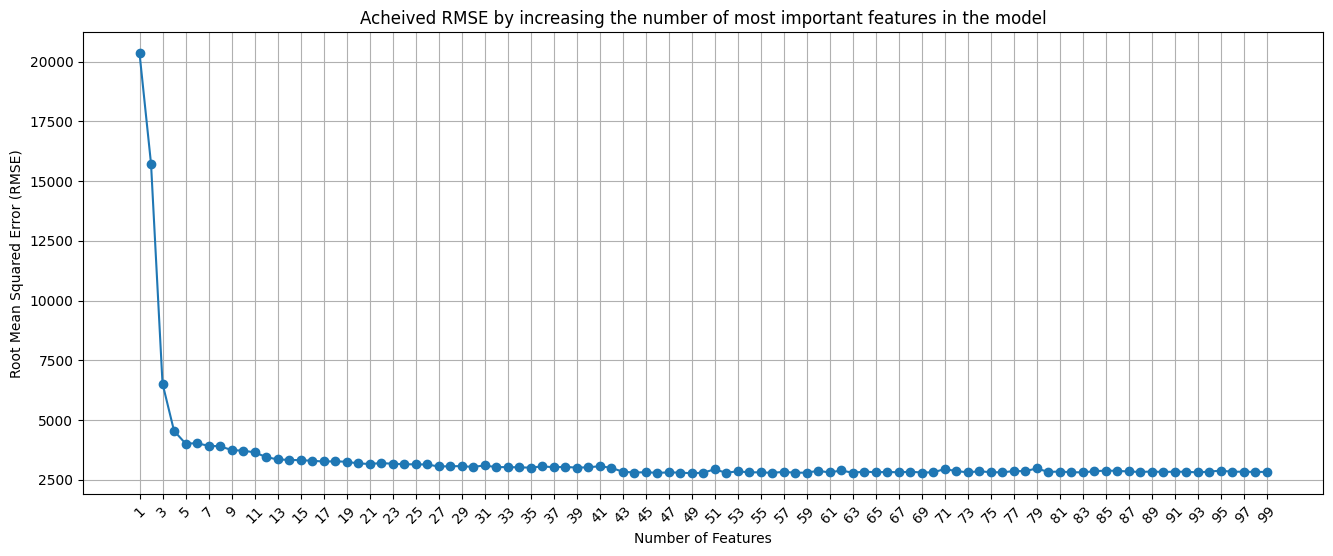

In [10]:
plt.figure(figsize=(16, 6))
x_axis = list(range(1, len(most_important_features_names)+1, 1))
plt.plot(x_axis, all_rmse_scores, marker='o')
plt.title('Acheived RMSE by increasing the number of most important features in the model')
plt.xlabel('Number of Features')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(x_axis[::2], rotation=45)
plt.grid()
plt.show()